## Imports

In [14]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Import our own implementations
import importlib, gradient_descent, prepare_data, polynomial_features
importlib.reload(gradient_descent)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)


from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_LASSO, momentum_gradient_descent_LASSO, \
    ADAGrad_gradient_descent_LASSO, RMSProp_gradient_descent_LASSO, ADAM_gradient_descent_LASSO

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()



## Testing Functions

### Standard gradient descent function, LASSO 

In [15]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 0.001
eta = 1e-2
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-3
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.         -0.97514466  0.00854018  1.02293945  0.         -0.
 -0.         -0.07509688 -0.00896357 -0.200661  ]
Number of iterations: 100000
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True False False False  True  True  True False False False].
Tolerance = 0.001


### Gradient descent with momentum, LASSO

In [16]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 4
lam = 0.0001
eta = 1e-3
num_iters = 100000
mom = 0.1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02760925 -0.64512713  0.02952902  0.450475  ]
Number of iterations: 55472
LASSO coefficients, Scikit learn:  [-0.02142985 -0.69949953  0.02566578  0.50494923]
GD parameters equal to parameters from sklearn: [ True False  True False].
Tolerance = 0.01


### Gradient descent with ADAGrad, LASSO

In [17]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 0.001
eta = 1e-1
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.         -1.03160022  0.00660484  1.18531463  0.         -0.
 -0.         -0.3815634  -0.00679305 -0.        ]
Number of iterations: 17109
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.01


### Gradient descent with RMSProp, LASSO

In [18]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8
lam = 0.00001
eta = 1e-3
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = RMSProp_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02672266 -2.09401031  0.17867277  5.81977076 -0.33512042 -6.56941488
  0.18842858  2.61217172]
Number of iterations: 100000
LASSO coefficients, Scikit learn:  [-0.02614834 -2.13960258  0.17734494  6.03823973 -0.34226685 -6.89443157
  0.19468921  2.7667896 ]
GD parameters equal to parameters from sklearn: [ True False  True False  True False  True False].
Tolerance = 0.01


### Gradient descent with ADAM, LASSO

In [19]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 1e-3
eta = 1e-2
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAM_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.         -1.0316093   0.00660528  1.18533104  0.         -0.
 -0.         -0.38157144 -0.00679357 -0.        ]
Number of iterations: 2595
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.01


## Computing paramters for different Lambdas, degree = 10

In [20]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
mom = 0.9
lambdas = np.logspace(-4, 2,20)
eta = 1e-3
num_iters = 500000
mom = 0.9

# Lists for MSEs
MSE_closed_form_LASSO = []
MSE_gd_fixed_learning_rate_LASSO = []
MSE_gd_momentum_LASSO = []
MSE_gd_ADAGrad_LASSO = []
MSE_gd_RMSProp_LASSO = []
MSE_gd_ADAM_LASSO = []

# Lists for R2-scores
R2_score_closed_form_LASSO=[]
R2_gd_fixed_learning_rate_LASSO = []
R2_gd_momentum_LASSO = []
R2_gd_ADAGrad_LASSO = []
R2_gd_RMSProp_LASSO = []
R2_gd_ADAM_LASSO = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_LASSO = []
num_iterations_gd_momentum_LASSO = []
num_iterations_gd_ADAGrad_LASSO = []
num_iterations_gd_RMSProp_LASSO = []
num_iterations_gd_ADAM_LASSO = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    # Computing parameters with the different methods:
    # SCIKITLEARN solution
    lasso = Lasso(alpha=l, fit_intercept=False, max_iter=num_iters)
    lasso.fit(X_train_s, y_train)
    beta_sklearn = lasso.coef_
    
    # Gradient descent, fixed learning rate:
    beta_gd_fixed_rate, t = gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-4, num_iters=num_iters)
    num_iterations_gd_fixed_learning_rate_LASSO.append(t)
    # Gradient descent with momentum
    beta_gd_momentum, t = momentum_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-3, momentum=mom, num_iters=num_iters)
    num_iterations_gd_momentum_LASSO.append(t)
    # Gradient descent with ADAGrad
    beta_gd_ADAGrad, t = ADAGrad_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-1, num_iters=num_iters)
    num_iterations_gd_ADAGrad_LASSO.append(t)
    # Gradient descent with RMSProp
    beta_gd_RMSProp, t = RMSProp_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-5, num_iters=num_iters)
    num_iterations_gd_RMSProp_LASSO.append(t)
    # Gradient descent with ADAM
    beta_gd_ADAM, t = ADAM_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-2, num_iters=num_iters)
    num_iterations_gd_ADAM_LASSO.append(t)
    
    # Predict
    y_pred_closed = X_test_s @ beta_sklearn + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_LASSO.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_LASSO.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_LASSO.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_LASSO.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_LASSO.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_LASSO.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))

## Plotting results

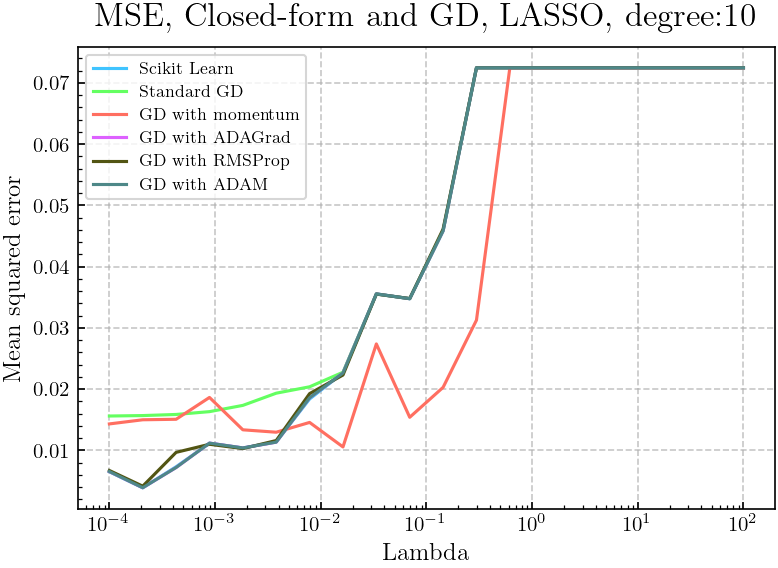

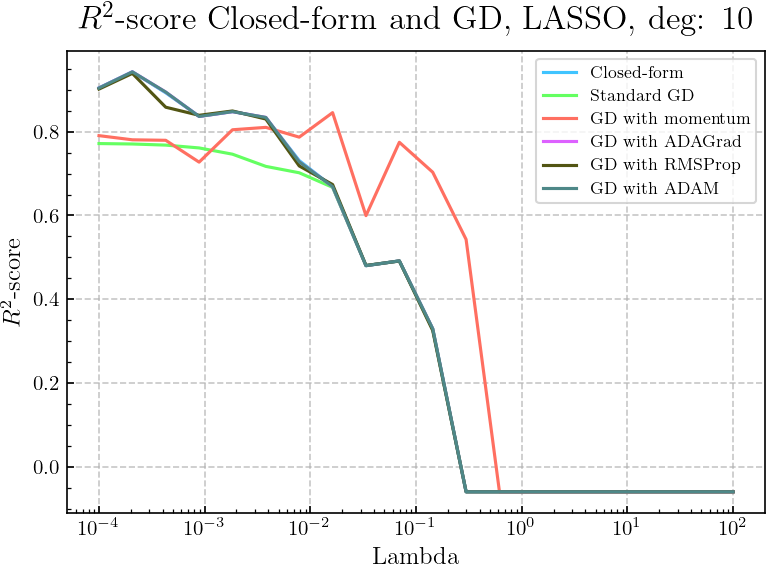

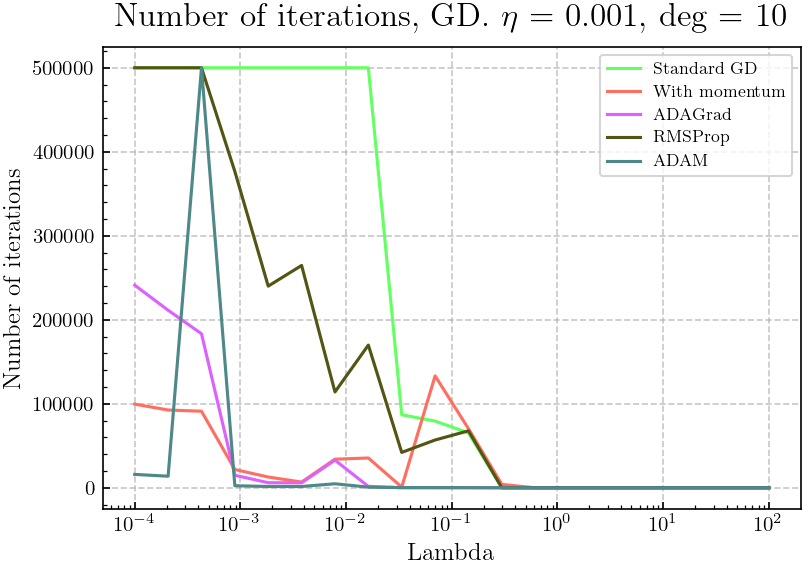

In [13]:
# MSEs
plt.figure()
plt.plot(lambdas, MSE_closed_form_LASSO, label="Scikit Learn", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_LASSO, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAGrad_LASSO, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_RMSProp_LASSO, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAM_LASSO, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"MSE, Closed-form and GD, LASSO, degree:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


# R2-scores
plt.plot(lambdas, R2_score_closed_form_LASSO, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, R2_gd_momentum_LASSO, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAGrad_LASSO, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_RMSProp_LASSO, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAM_LASSO, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"$R^2$-score Closed-form and GD, LASSO, deg: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda",fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


# Number of iterations
plt.plot(lambdas, num_iterations_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_momentum_LASSO, label="With momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAGrad_LASSO, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_RMSProp_LASSO, label="RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAM_LASSO, label="ADAM", color='#4E8888', linewidth=1.5)
plt.title(rf"Number of iterations, GD. $\eta$ = {eta}, deg = {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()